In [1]:
#the packages used
import pandas as pd
import sqlite3
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [2]:
#checking the tables in the sqlite_db

db = sqlite3.connect('../data/ehr.sqlite')
db.execute("""SELECT 
    name
FROM 
    sqlite_schema
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';""").fetchall()

[('patients',), ('admission',), ('diagicd',), ('ictarget',)]

In [3]:
#ictarget

query = """
SELECT *
FROM ictarget
LIMIT 3

"""

with sqlite3.connect('../data/ehr.sqlite') as db: 
    ictar = pd.read_sql(query, db)
ictar

,unnamed:_0,subject_id,hadm_id,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85
0,0,10000032,22841357,0,0,1,0,0,0,0,0,0
1,1,10000032,25742920,0,0,1,0,0,0,0,0,0
2,2,10000032,29079034,0,0,1,0,0,0,0,0,0


In [4]:
#ictarget

query = """
SELECT *
FROM admission
LIMIT 3

"""

with sqlite3.connect('../data/ehr.sqlite') as db: 
    adm = pd.read_sql(query, db)
adm


,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,None,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,None,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,None,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0


In [4]:
#ictarget

query = """
SELECT *
FROM patients
LIMIT 3

"""

with sqlite3.connect('../data/ehr.sqlite') as db: 
    patient = pd.read_sql(query, db)
patient

,unnamed:_0,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod,min_year_group,max_year_group,min_age,base_anchor_year
0,0,10000032,F,52,2180,2014 - 2016,2180-09-09 00:00:00,2014,2016,44,2174
1,1,10000048,F,23,2126,2008 - 2010,0,2008,2010,21,2126
2,2,10000068,F,19,2160,2008 - 2010,0,2008,2010,17,2160


In [5]:
query="""
SELECT COUNT(DISTINCT subject_id) as patient_count
FROM ictarget
"""
with sqlite3.connect('../data/ehr.sqlite') as db: 
    pat_count = pd.read_sql(query, db)
pat_count

,patient_count
0,115012


In [29]:
query="""
SELECT p.subject_id, p.dod, p.min_age, ic.icd_E11, a.race
FROM patients as p
INNER JOIN admission as a
on a.subject_id = p.subject_id
INNER JOIN ictarget as ic
ON p.subject_id = ic.subject_id
GROUP BY p.subject_id


"""
# GROUP BY icd_E11
with sqlite3.connect('../data/ehr.sqlite') as db: 
    e11 = pd.read_sql(query, db)
e11

#how to add 1 for the numeric string

,subject_id,dod,min_age,icd_e11,race
0,10000032,2180-09-09 00:00:00,44,0,WHITE
1,10000084,2161-02-13 00:00:00,61,0,WHITE
2,10000117,0,46,0,WHITE
3,10000248,0,26,0,WHITE
4,10000764,0,78,0,WHITE
...,...,...,...,...,...
115007,19999625,0,79,0,WHITE
115008,19999784,0,46,0,BLACK/AFRICAN AMERICAN
115009,19999828,0,35,1,WHITE
115010,19999840,2164-09-17 00:00:00,56,0,WHITE


In [30]:
e11.groupby('icd_e11').mean()

e11['icd_e11'].value_counts()

# plt.boxplot(data)
# plt.show

C:\Users\upadh\AppData\Local\Temp\ipykernel_17620\1865767695.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  e11.groupby('icd_e11').mean()


0    88528
1    26484
Name: icd_e11, dtype: int64

<Axes: xlabel='icd_e11,dod_x'>

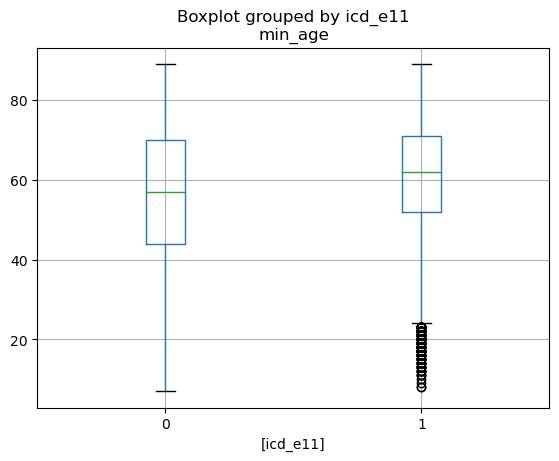

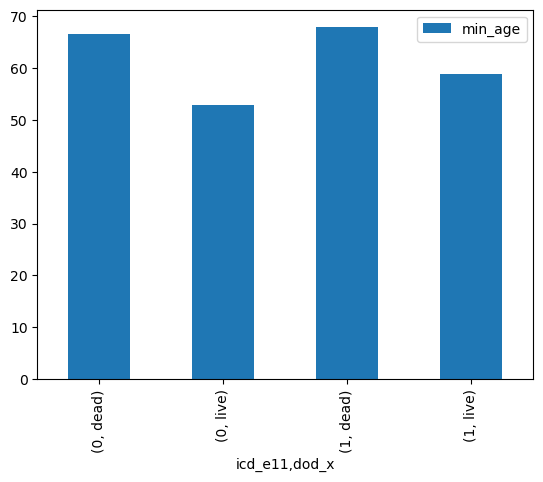

In [43]:
e11[['icd_e11','min_age']].boxplot(by='icd_e11')

e11.groupby(['icd_e11','dod_x'])['min_age'].mean().to_frame().plot(kind='bar')

In [32]:
e11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115012 entries, 0 to 115011
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   subject_id  115012 non-null  int64 
 1   dod         115012 non-null  object
 2   min_age     115012 non-null  int64 
 3   icd_e11     115012 non-null  int64 
 4   race        115012 non-null  object
dtypes: int64(3), object(2)
memory usage: 4.4+ MB


<Axes: xlabel='icd_e11,dod_x'>

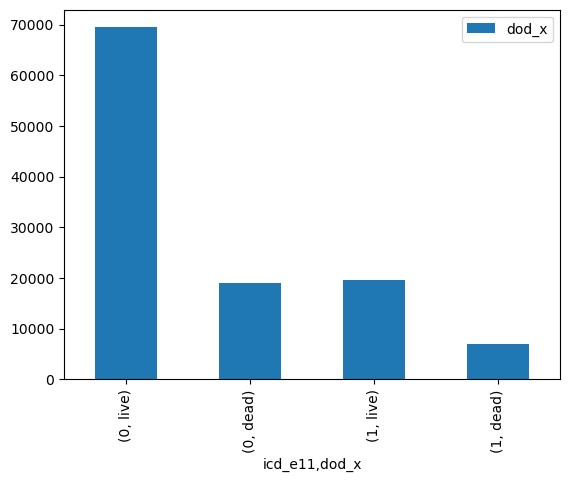

In [40]:
e11['dod_x'] = np.where(e11['dod'] == '0', 'live', 'dead')
e11.groupby('icd_e11')['dod_x'].value_counts().to_frame().plot(kind='bar')

<Axes: xlabel='icd_e11', ylabel='min_age'>

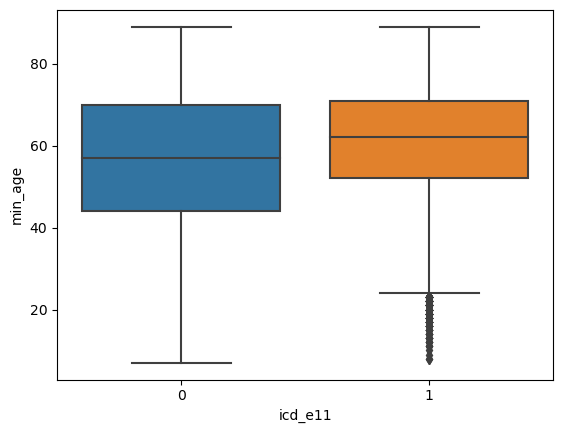

In [54]:
# e11.groupby(['icd_e11','dod_x'])['min_age'].plot(kind='box')
sns.boxplot(data = e11, x = "icd_e11", y = "min_age")

<Axes: xlabel='dod_x', ylabel='min_age'>

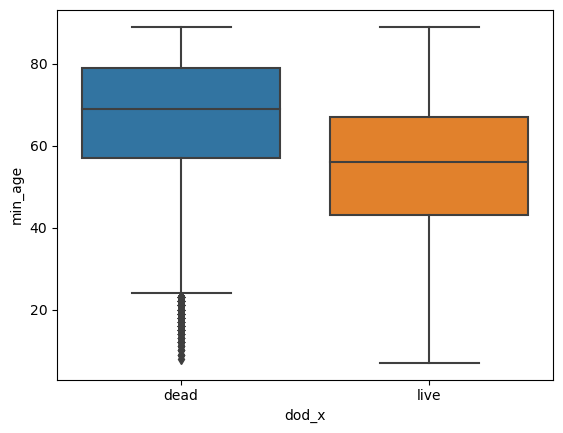

In [56]:
sns.boxplot(data = e11, x = "dod_x", y = "min_age")

subject_id	hadm_id	admittime	dischtime	deathtime	admission_type	admit_provider_id	admission_location	discharge_location	insurance	language	marital_status	race	edregtime	edouttime	hospital_expire_flag

In [47]:
# query="""
# SELECT p.subject_id, p.dod, p.min_age, ic.icd_E11, a.race
# FROM patients as p
# INNER JOIN admission as a
# on a.subject_id = p.subject_id
# INNER JOIN ictarget as ic
# ON p.subject_id = ic.subject_id
# GROUP BY p.subject_id


# """
query="""

SELECT a.subject_id, a.hadm_id, a.dischtime, a.admittime
FROM admission as a

"""

# SELECT cust_name, opening_amt, 
# receive_amt, (opening_amt + receive_amt)
# FROM customer
# WHERE (opening_amt + receive_amt)>15000;


# GROUP BY icd_E11
with sqlite3.connect('../data/ehr.sqlite') as db: 
    los = pd.read_sql(query, db)
los

,subject_id,hadm_id,dischtime,admittime
0,10000032,22595853,2180-05-07 17:15:00,2180-05-06 22:23:00
1,10000032,22841357,2180-06-27 18:49:00,2180-06-26 18:27:00
2,10000032,25742920,2180-08-07 17:50:00,2180-08-05 23:44:00
3,10000032,29079034,2180-07-25 17:55:00,2180-07-23 12:35:00
4,10000068,25022803,2160-03-04 06:26:00,2160-03-03 23:16:00
...,...,...,...,...
431226,19999828,25744818,2149-01-18 17:00:00,2149-01-08 16:44:00
431227,19999828,29734428,2147-08-04 18:10:00,2147-07-18 16:23:00
431228,19999840,21033226,2164-09-17 13:42:00,2164-09-10 13:47:00
431229,19999840,26071774,2164-07-28 12:15:00,2164-07-25 00:27:00


In [37]:
los[["dischtime", "admittime"]] = los[["dischtime", "admittime"]].apply(pd.to_datetime)
los.info()

los['length_of_stay(hours)'] = round((((los['dischtime'] - los['admittime'])).dt.total_seconds() / 3600), 2)
# los['length_of_stay(days)'] = ((los['dischtime'] - los['admittime'])).astype('<m8[m]').astype(int)
                         
los

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431231 entries, 0 to 431230
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   subject_id             431231 non-null  int64         
 1   hadm_id                431231 non-null  int64         
 2   dischtime              431231 non-null  datetime64[ns]
 3   admittime              431231 non-null  datetime64[ns]
 4   length_of_stay(hours)  431231 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 16.5 MB


,subject_id,hadm_id,dischtime,admittime,length_of_stay(hours)
0,10000032,22595853,2180-05-07 17:15:00,2180-05-06 22:23:00,18.87
1,10000032,22841357,2180-06-27 18:49:00,2180-06-26 18:27:00,24.37
2,10000032,25742920,2180-08-07 17:50:00,2180-08-05 23:44:00,42.10
3,10000032,29079034,2180-07-25 17:55:00,2180-07-23 12:35:00,53.33
4,10000068,25022803,2160-03-04 06:26:00,2160-03-03 23:16:00,7.17
...,...,...,...,...,...
431226,19999828,25744818,2149-01-18 17:00:00,2149-01-08 16:44:00,240.27
431227,19999828,29734428,2147-08-04 18:10:00,2147-07-18 16:23:00,409.78
431228,19999840,21033226,2164-09-17 13:42:00,2164-09-10 13:47:00,167.92
431229,19999840,26071774,2164-07-28 12:15:00,2164-07-25 00:27:00,83.80


In [69]:
query="""

SELECT a.subject_id, a.hadm_id, a.dischtime, a.admittime, a.race, ic.icd_E11, ic.icd_E78, ic.icd_E87, ic.icd_F32,
ic.icd_I16, ic.icd_I50, ic.icd_N17, ic.icd_Y92, ic.icd_Z85
FROM admission as a
INNER JOIN ictarget as ic
ON a.subject_id = ic.subject_id
    AND a.hadm_id = ic.hadm_id

"""
# INNER JOIN patient as p
# ON p.subject_id = ic.subject_id
# p.dod, p.min_age, 
# INNER JOIN ictarget as ic
# ON a.subject_id = ic.subject_id
# AND a.hadm_id = ic.hadm_id
#  p.dod, p.min_age,
# ic.icd_E78, ic.icd_E87, ic.icd_F32,
# ic.icd_I16, ic.icd_I50, ic.icd_N17, ic.icd_Y92, ic.icd_Z85, 
# INNER JOIN patient as p
# on a.subject_id = p.subject_id
# GROUP BY p.subject_id
# GROUP BY icd_E11

with sqlite3.connect('../data/ehr.sqlite') as db: 
    mer = pd.read_sql(query, db)
mer


,subject_id,hadm_id,dischtime,admittime,race,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85
0,10000032,22841357,2180-06-27 18:49:00,2180-06-26 18:27:00,WHITE,0,0,1,0,0,0,0,0,0
1,10000032,25742920,2180-08-07 17:50:00,2180-08-05 23:44:00,WHITE,0,0,1,0,0,0,0,0,0
2,10000032,29079034,2180-07-25 17:55:00,2180-07-23 12:35:00,WHITE,0,0,1,0,0,0,0,0,0
3,10000084,23052089,2160-11-25 14:52:00,2160-11-21 01:56:00,WHITE,0,1,0,0,0,0,0,0,1
4,10000117,27988844,2183-09-21 16:30:00,2183-09-18 18:10:00,WHITE,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263936,19999828,25744818,2149-01-18 17:00:00,2149-01-08 16:44:00,WHITE,1,0,1,0,0,0,0,1,0
263937,19999828,29734428,2147-08-04 18:10:00,2147-07-18 16:23:00,WHITE,1,0,0,0,0,0,0,1,0
263938,19999840,21033226,2164-09-17 13:42:00,2164-09-10 13:47:00,WHITE,0,1,0,0,1,0,0,0,0
263939,19999840,26071774,2164-07-28 12:15:00,2164-07-25 00:27:00,WHITE,0,1,0,0,1,0,0,0,0


In [71]:
mer[["dischtime", "admittime"]] = mer[["dischtime", "admittime"]].apply(pd.to_datetime)
mer['length_of_stay(hours)'] = round((((mer['dischtime'] - mer['admittime'])).dt.total_seconds() / 3600), 2)
mer.drop(columns=["dischtime", "admittime"], axis=1)

,subject_id,hadm_id,race,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85,length_of_stay(hours)
0,10000032,22841357,WHITE,0,0,1,0,0,0,0,0,0,24.37
1,10000032,25742920,WHITE,0,0,1,0,0,0,0,0,0,42.10
2,10000032,29079034,WHITE,0,0,1,0,0,0,0,0,0,53.33
3,10000084,23052089,WHITE,0,1,0,0,0,0,0,0,1,108.93
4,10000117,27988844,WHITE,0,1,0,0,0,0,0,1,0,70.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263936,19999828,25744818,WHITE,1,0,1,0,0,0,0,1,0,240.27
263937,19999828,29734428,WHITE,1,0,0,0,0,0,0,1,0,409.78
263938,19999840,21033226,WHITE,0,1,0,0,1,0,0,0,0,167.92
263939,19999840,26071774,WHITE,0,1,0,0,1,0,0,0,0,83.80


In [84]:
# there are 33 races in the dataset

import seaborn as sns

In [97]:
race_per = ((mer['race'].value_counts()*100/len(mer)).to_frame().reset_index()
            .rename(columns={'indes':'race', 'race':'Counts'}))
race_per.head()

,index,Counts
0,WHITE,65.790082
1,BLACK/AFRICAN AMERICAN,12.776340
2,OTHER,3.091221
3,UNKNOWN,2.995366
4,WHITE - OTHER EUROPEAN,2.001963


<Axes: xlabel='icd_i50'>

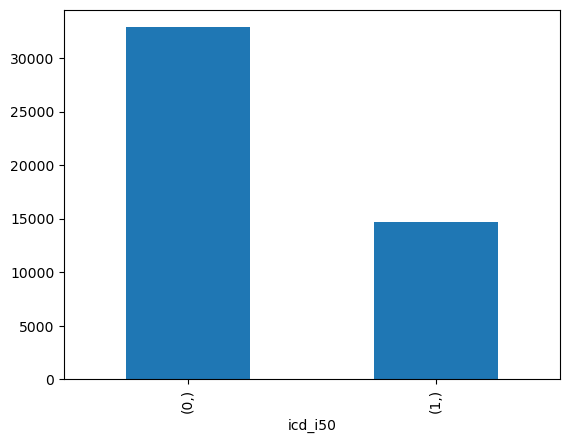

In [104]:
mer.loc[(mer['race']=='WHITE') & (mer['icd_e11']==1)][[ 'icd_i50']].value_counts().plot(kind='bar')

In [78]:
mer.groupby('icd_e11')['race'].value_counts().to_frame()

race
icd_e11 race                                             
0       WHITE                                      126106
        BLACK/AFRICAN AMERICAN                      18040
        UNKNOWN                                      5725
        OTHER                                        5242
        WHITE - OTHER EUROPEAN                       3975
...                                                   ...
1       WHITE - BRAZILIAN                             103
        SOUTH AMERICAN                                 88
        ASIAN - KOREAN                                 80
        MULTIPLE RACE/ETHNICITY                        75
        NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER      56

[66 rows x 1 columns]

In [113]:
query="""

SELECT a.subject_id, a.hadm_id, a.dischtime, a.admittime, a.race, ic.icd_E11, ic.icd_E78, ic.icd_E87, ic.icd_F32,
ic.icd_I16, ic.icd_I50, ic.icd_N17, ic.icd_Y92, ic.icd_Z85, p.dod, p.min_age
FROM admission as a
INNER JOIN ictarget as ic
ON a.subject_id = ic.subject_id
    AND a.hadm_id = ic.hadm_id
INNER JOIN patients as p
ON p.subject_id = a.subject_id

"""
# AND ic.hadm_id = a.hadm_id
# p.dod, p.min_age,
# INNER JOIN patient as p
# on a.subject_id = p.subject_id
# GROUP BY p.subject_id
# GROUP BY icd_E11
with sqlite3.connect('../data/ehr.sqlite') as db: 
    mer1 = pd.read_sql(query, db)
mer1
    

,subject_id,hadm_id,dischtime,admittime,race,icd_e11,icd_e78,icd_e87,icd_f32,icd_i16,icd_i50,icd_n17,icd_y92,icd_z85,dod,min_age
0,10000032,22841357,2180-06-27 18:49:00,2180-06-26 18:27:00,WHITE,0,0,1,0,0,0,0,0,0,2180-09-09 00:00:00,44
1,10000032,25742920,2180-08-07 17:50:00,2180-08-05 23:44:00,WHITE,0,0,1,0,0,0,0,0,0,2180-09-09 00:00:00,44
2,10000032,29079034,2180-07-25 17:55:00,2180-07-23 12:35:00,WHITE,0,0,1,0,0,0,0,0,0,2180-09-09 00:00:00,44
3,10000084,23052089,2160-11-25 14:52:00,2160-11-21 01:56:00,WHITE,0,1,0,0,0,0,0,0,1,2161-02-13 00:00:00,61
4,10000117,27988844,2183-09-21 16:30:00,2183-09-18 18:10:00,WHITE,0,1,0,0,0,0,0,1,0,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263936,19999828,25744818,2149-01-18 17:00:00,2149-01-08 16:44:00,WHITE,1,0,1,0,0,0,0,1,0,0,35
263937,19999828,29734428,2147-08-04 18:10:00,2147-07-18 16:23:00,WHITE,1,0,0,0,0,0,0,1,0,0,35
263938,19999840,21033226,2164-09-17 13:42:00,2164-09-10 13:47:00,WHITE,0,1,0,0,1,0,0,0,0,2164-09-17 00:00:00,56
263939,19999840,26071774,2164-07-28 12:15:00,2164-07-25 00:27:00,WHITE,0,1,0,0,1,0,0,0,0,2164-09-17 00:00:00,56
